# Soc 5 Spring 2019

## Discussion 2: Analyzing Quantitative Data II

Estimated time: 40 minutes

**Before you begin, run the following cell to load the packages needed for the rest of the notebook**

In [1]:
# RUN THIS CELL or the notebook will not work properly
%run Data/functions.py
%matplotlib inline
from scipy import stats
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## Introduction

In this discussion, you will learn how to interpret both quantitative and qualitative data through the chi-square statistic, t tests, linear regression, and the $r$ statistic.

### The Data <a id='data'></a>

In this notebook, we'll be revisiting the GSS 2014 data that you saw in Discussion 1. Let's first load in the data.

In [2]:
gss_survey_data = Table.read_table("GSS_2014_cleaned.csv")
gss_survey_data

CASEID,SEX,EDUC,AGE,NATEDUC,NATFARE,NATROAD,NATMASS,NATHEAL,NATENVIR
58649,1,0,41,1,1,1,1,1,1
58007,2,0,78,1,1,2,3,1,3
58356,2,1,34,1,1,2,2,2,1
57246,2,3,56,1,1,2,1,2,1
58427,1,5,38,1,2,2,1,1,2
59067,1,5,64,1,1,1,1,1,1
57446,1,6,39,1,2,2,2,2,2
57633,1,6,55,1,1,2,2,1,1
57913,1,6,50,1,2,3,2,1,1
58127,1,6,59,1,3,2,2,1,1


### The Codebook

Take a look at the `GSS 2014 codebook` PDF file to review what these variables mean. The file is contained within the "Data" folder, which is in the same folder as this notebook. 

If your browser has problems opening the PDF, try downloading it to your computer. To do this:

1. Navigate inside the Data folder
2. Check the box next to the `GSS 2014 codebook.pdf` file
3. Click the "Download" button on the top toolbar

---

## Section 1: Chi-Square Statistic  <a id='section 1'></a>

Here, we are going to learn how to interpret the Chi-Square Statistic.

In this particular example, we will find the Chi-Square Statistic between the responses to NATMASS vs NATENVIR. From intuition, we expect that people who voted for more money spend on mass transportation would also support improving and protecting the environment. We can see if that is the case my looking at the Chi-Square Statistic.

Firstly, we have to construct a contingency table of the 2 attributes (NATMASS and NATENVIR):

In [3]:
contigTable = generate_3x3_contingency_table(gss_survey_data, "NATMASS", "NATENVIR")
contigTable

NATENVIR,1 (NATMASS),2 (NATMASS),3 (NATMASS),total (NATMASS)
1 (NATENVIR),419,455,55,929
2 (NATENVIR),152,282,38,472
3 (NATENVIR),39,58,37,134
total (NATENVIR),610,795,130,1535


The columns of the table correspond to the score a respondant gave for NATMASS, and the rows correspond to the score a respondant gave for NATENVIR. Each cell correspond to the total number of people who voted with the specific answers to NATMASS and NATENVIR.

Before we calculate the chi-squared statistic, lets first see the expected distribution of this table:

In [4]:
expected = find_expected_dist(contigTable, "NATMASS", "NATENVIR")
expected

NATENVIR,1 (NATMASS),2 (NATMASS),3 (NATMASS),total (NATMASS)
1 (NATENVIR),369.179,481.143,78.6775,929
2 (NATENVIR),187.57,244.456,39.9739,472
3 (NATENVIR),53.2508,69.4007,11.3485,134
total (NATENVIR),610,795,130,1535


The expected distributions is dictated under the Null Hypothesis, which assumes that there is no correlation between the 2 attributes. In order to prove/disprove the Null Hypothesis, lets solve for the Chi-Square Statistic! <br><br>
(You do not need to know how we solve for the statistic, but just know how to interpret it!)

In [5]:
chi_squared, degree_freedom = find_chi_square(contigTable)

print("chi-squared statistic = " + str(chi_squared))
print("degrees of freedom = " + str(degree_freedom))

chi-squared statistic = 91.5457976538473
degrees of freedom = 4


The critical chi-squared statistic for a 0.05 probability level (p value) and a degree of freedom of 4 is 9.488. 
Knowing this, is there a significant correlation between NATENVIR and NATMASS? Explain your answer. 

**Answer:** ...

Explain why the degrees of freedom is 4.

**Answer:** ...

---

## Section 2: T-tests <a id='section 2'></a>

Here, we are going to learn how to use t-tests for differences in means. 

In this example, we will be looking at the differences between the female and the male responses (, or more specifically, their responses to NATFARE). 

Our Null Hypothesis would be that there should be no significant difference between the 2 groups' responses to NATFARE, whereas the Alternative Hypothesis is that this is a significant difference between the 2 groups' responses to NATFARE.

In [6]:
columns_of_interest = ["NATEDUC", "NATFARE", "NATROAD", "NATMASS", "NATHEAL", "NATENVIR"]

females = gss_survey_data.where("SEX", are.equal_to(2))

means_female = generate_means_table(females, columns_of_interest)
means_female.relabel("category", "category (female)")

print("female sample size = " + str(females.num_rows))
means_female

female sample size = 807


category (female),mean,standard deviation
NATEDUC,1.28996,0.56339
NATFARE,2.2689,0.79235
NATROAD,1.70012,0.7
NATMASS,1.71499,0.601988
NATHEAL,1.51177,0.717664
NATENVIR,1.48203,0.638975


In [7]:
males = gss_survey_data.where("SEX", are.equal_to(1))

means_male = generate_means_table(males, columns_of_interest)
means_male.relabel("category", "category (male)")

print("male sample size = " + str(males.num_rows))
means_male

male sample size = 728


category (male),mean,standard deviation
NATEDUC,1.36401,0.602806
NATFARE,2.24588,0.769426
NATROAD,1.53846,0.645061
NATMASS,1.65659,0.637807
NATHEAL,1.55082,0.709162
NATENVIR,1.48214,0.664822


As you can see from the tables above, the 2 tables seperate out the male responses from the female responses, and averages all their responses in both groups. However, we will only be looking at the NATFARE's mean and standard deviation in calculating the t value.

(again, you do not need to know how we solve for the statistic, but just know how to interpret it!)

In [8]:
t = generate_t_value(means_female, means_male, females.num_rows, males.num_rows, "NATFARE")

print("t value = " + str(t))

t value = 0.018828604485708306


The critical t value for siginificance level of 0.05 and degrees of freedom of 1533 (= total female sample + total male sample - 2) is 1.645848. Knowing this, what can we say about our null hypothesis?

**Answer:** ...

---

## Section 3: Linear Regression <a id='section 3'></a>

Here, we are going to learn how to interpret the linear regression line and its R-statistic (also known as the r value or the Pearson r statistic).

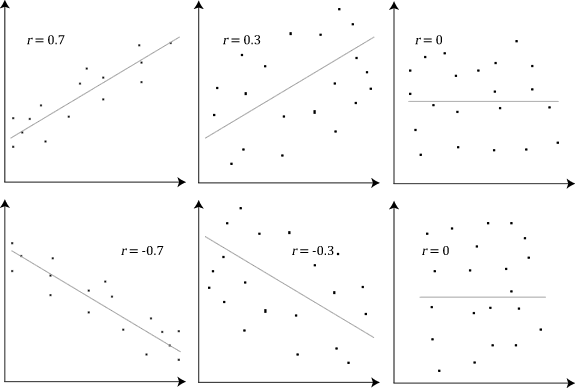

Here we have a nice diagram outlining different types of r values. From the picture, we can see that a set of data with a positive slope (positive correlation) will have a positive r value, and vice versa. Also, the closer the data is to the line, the further the r value is from 0; if the data has basically no correlation, the r value equals 0.

In this example, we will see if there is a correlation between AGE and EDUC. The codebox below will make a scatter plot of the 2 attributes:

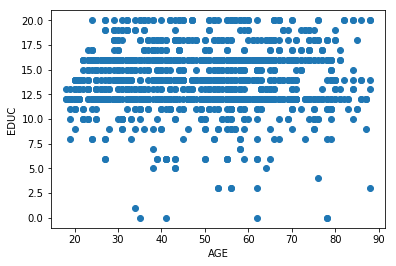

In [9]:
plt.scatter(gss_survey_data["AGE"], gss_survey_data["EDUC"])
plt.xlabel('AGE')
plt.ylabel('EDUC')
plt.show()

Well, things aren't looking too good; it seems like there is very little correlation between the respondant's age and their education level. We can still try to find the best fit line and find its corresponding value:

regression line : y=0.006933189184531947x + 13.564512011776326
r value = 0.038030881150196545


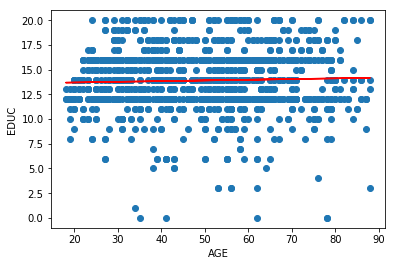

In [10]:
m, c, r_value, p_value, std_err = stats.linregress(gss_survey_data["AGE"], gss_survey_data["EDUC"])

plt.plot(gss_survey_data["AGE"], gss_survey_data["EDUC"], 'o', label='Original data')
plt.plot(gss_survey_data["AGE"], m*gss_survey_data["AGE"] + c, 'r', label='Fitted line')

print("regression line : y=" + str(m) +"x + " + str(c))
print("r value = "+ str(r_value))
plt.xlabel('AGE')
plt.ylabel('EDUC')
plt.show()

From what you know about the Pearson r statistic, what can you say about the data given the r value? Also, is the plot contrary to what you expect? Explain your answers.

**Answer:** ...

Since the correlation between AGE and EDUC is not great, lets look at something else. 

Lets now try grouping the table by EDUC, then plotting the mean of their NATEDUC for each group. As a reminder, NATEDUC stands for their view on how much money should be provided to improving the nation's education system.

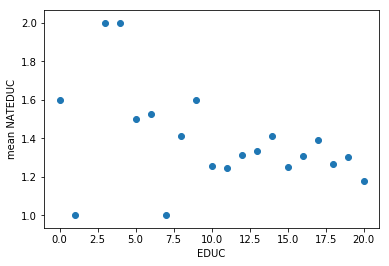

In [11]:
grouped_educ = gss_survey_data.group("EDUC", np.mean)
plt.scatter(grouped_educ["EDUC"], grouped_educ["NATEDUC mean"])
plt.xlabel('EDUC')
plt.ylabel('mean NATEDUC')
plt.show()

Immediately, we can see that there is a much better correlation between EDUC and the mean NATEDUC for each level of education. Now it's your turn to experiment and try to find the line of best fit! Below is an interactive plot that allows you to control the slope and y-intercept of a line, and its your job to try to find the best line that minimizes the error that printed under the plot!

The plot may take some time to load, so be patient with it :)

Play around with the plot and try your best to minimize the error; you don't have to be exact! 

In [12]:
@interact(m=(-5/100, 0, 1/1000), c=(1.6, 2, 1/100))
def g(m, c):
    est = m*grouped_educ["EDUC"] + c
    plt.plot(grouped_educ["EDUC"], grouped_educ["NATEDUC mean"], 'o', label='Original data')
    plt.plot(grouped_educ["EDUC"], est, 'r', label='Fitted line')
    plt.xlabel('EDUC')
    plt.ylabel('mean NATEDUC')
    plt.show()
    
    error = ((grouped_educ["NATEDUC mean"] - (m*grouped_educ["EDUC"] + c))**2).mean()
    
    print("y = "+str(m)+"x+"+str(c))
    print("error = "+str(error))
    return

interactive(children=(FloatSlider(value=-0.025, description='m', max=0.0, min=-0.05, step=0.001), FloatSlider(…

Now let's calculate the true line of best fit, and the corresponding error and r value.

regression line : y=-0.0173075319239169x + 1.574827814793762
error = 0.05483313586695303

r value = -0.4013120226007003


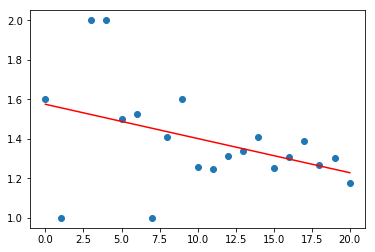

In [13]:
m_i, c_i, r_value, p_value, std_err = stats.linregress(grouped_educ["EDUC"], grouped_educ["NATEDUC mean"])
plt.plot(grouped_educ["EDUC"], grouped_educ["NATEDUC mean"], 'o', label='Original data')
plt.plot(grouped_educ["EDUC"], m_i*grouped_educ["EDUC"] + c_i, 'r', label='Fitted line')

error = ((grouped_educ["NATEDUC mean"] - (m_i*grouped_educ["EDUC"] + c_i))**2).mean()
print("regression line : y=" + str(m_i) +"x + " + str(c_i))
print("error = " + str(error))
print()
print("r value = "+ str(r_value))
plt.show()

How close was your line in the interactive plot to the true best fit line? Given the r value, what can you say about the data?

**Answer:** ...

## Bibliography

- Pearson Product-Moment Correlation (picture). https://statistics.laerd.com/statistical-guides/pearson-correlation-coefficient-statistical-guide.php

Notebook developed by: William Sheu

Data Science Modules: http://data.berkeley.edu/education/modules